## Boston Housing Dataset

Source: https://www.kaggle.com/c/boston-housing

crim - per capita crime rate by town.

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox - nitrogen oxides concentration (parts per 10 million).

rm - average number of rooms per dwelling.

age - proportion of owner-occupied units built prior to 1940.

dis - weighted mean of distances to five Boston employment centres.

rad - index of accessibility to radial highways.

tax - full-value property-tax rate per $10,000.

ptratio - pupil-teacher ratio by town.

lstat - lower status of the population (percent).

medv - median value of owner-occupied homes in $1000s.

In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Linear Regression
Tanım: Bağımlı değişken ile bir veya daha fazla bağımsız değişken arasında doğrusal bir ilişki olduğunu varsayar.
Amaç: Hata kareleri toplamını minimize eden en iyi doğrultuyu bulmak
### 2. Lasso Regression
Tanım: LR 'ye benzer, ancak modelin karmaşıklığını azaltmak için bazı katsayıları sıfıra çeker. (Özellik seçimi yapar)
Not: L1 Regularization - ÖDEV
Amaç: Aşırı uyumu (overfitting) azaltmak, sadece bir model elde etmek
### 3. Ridge Regression
Tanım: Lasso gibi düzenleme uygular ancak L2 normu ile. Katsayıları küçültür ama genelde sıfıra indirmez.
Amaç: Overfitting'i azaltmak ama tüm değişkenleri modelde tutmak
### 4. Stochastic Gradient Descent Regression
Tanım: Özellikle büyük veri setlerinde daha hızlı eğitim için kullanılan, her seferde küçük veri alt kümeleri ile modeli güncelleyen bir yaklaşım.
Not: Gradient Descent - Gradient Ascent nedir? Bu algoritmalardaki Stochastic Nedir?
Amaç: Hızlı eğitim, küçük veri alt kümelerine bölüyor
### 5. MLP (Multi-Layer Perceptron) Regressor
Tanım: Sinir ağı tabanlı regresyon yöntemidir. Doğrusal olmyan ilişkileri de öğrenebilir. Aktivasyon fonksiyonları ve gizli katmanlar sayesinde daha karmaşık ilişkilere uygundur.

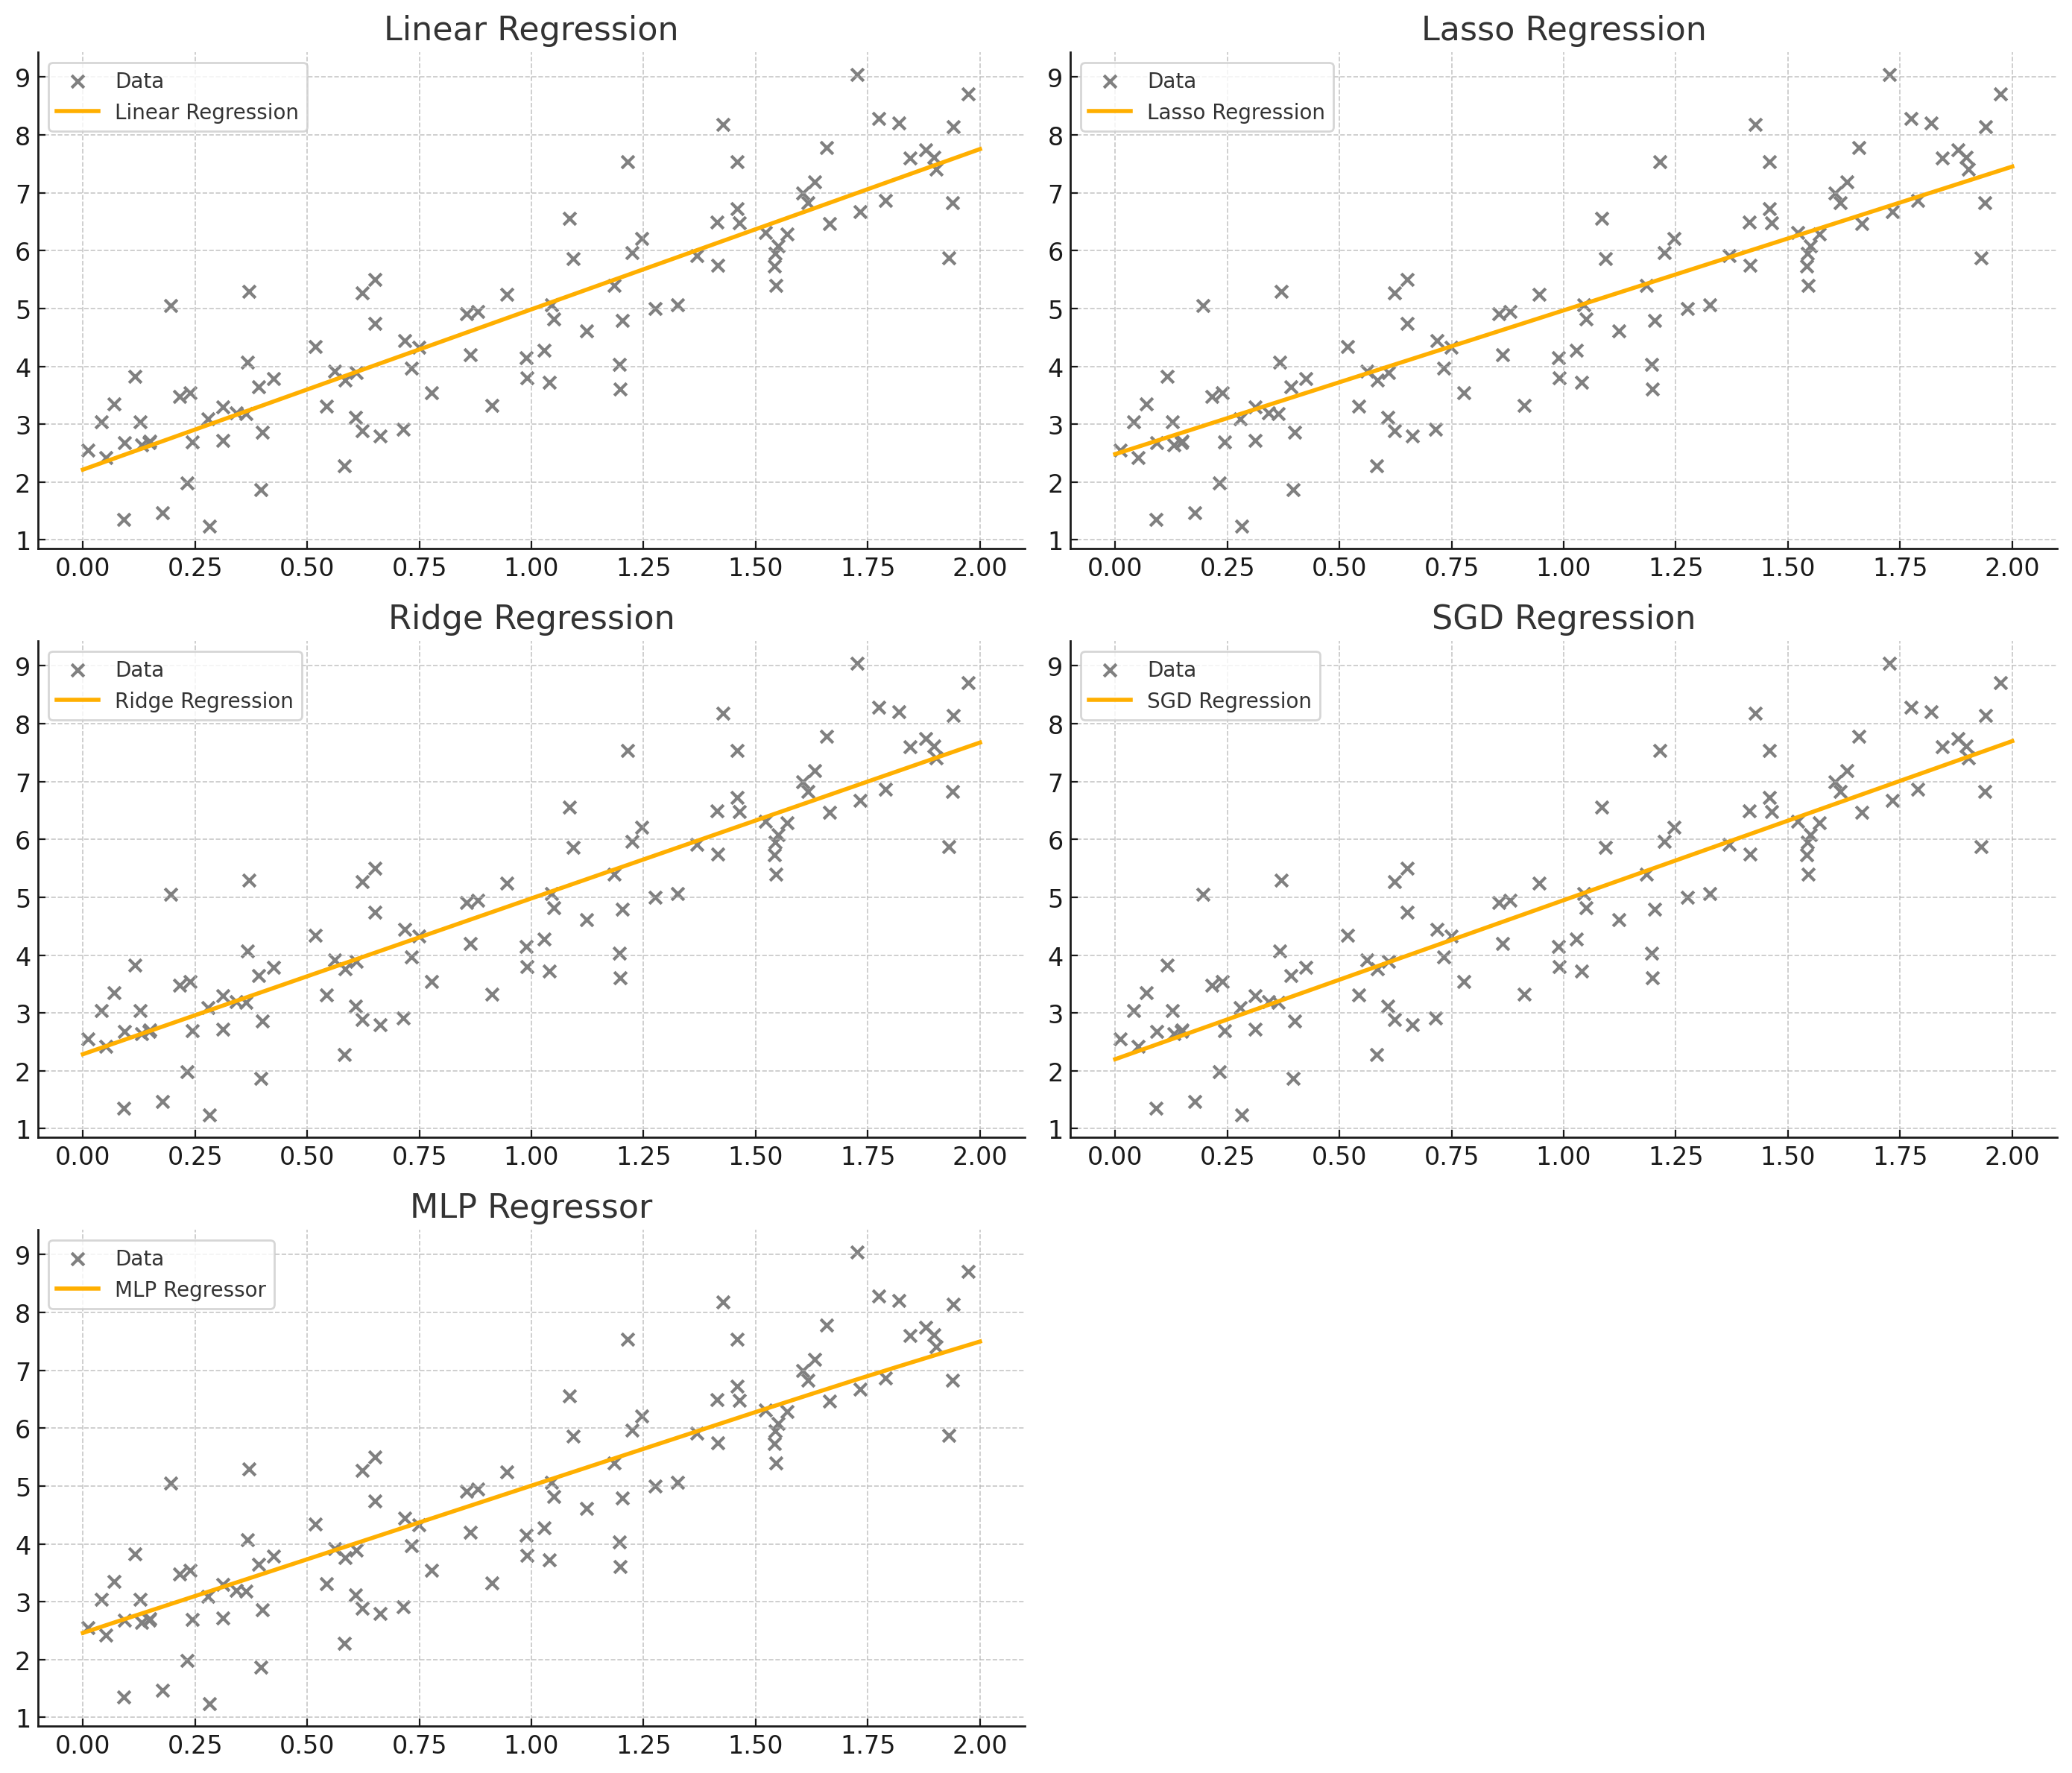

In [2]:
data = pd.read_csv("boston_data.csv")
data.head()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [3]:
data.isnull().sum()

ID         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [4]:
data.describe()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,147.859438,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,1.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,123.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,244.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,377.000000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,506.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


In [6]:
corr = data.corr()
corr

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,1.000000,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,0.281953,-0.221694
indus,0.421978,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,0.614155,-0.473932
chas,0.007958,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,-0.050055,0.204390
nox,0.440185,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,0.598874,-0.413054
rm,-0.112790,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,-0.615747,0.689598
age,0.257300,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,0.588834,-0.358888
dis,-0.356461,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,-0.505939,0.249422
rad,0.707526,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,0.484568,-0.352251
tax,0.686246,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,0.544485,-0.448078
ptratio,0.309838,0.391087,-0.125067,0.192513,-0.366927,0.259293,-0.231101,0.470849,0.467437,1.000000,0.374802,-0.481376


d:\Anaconda\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


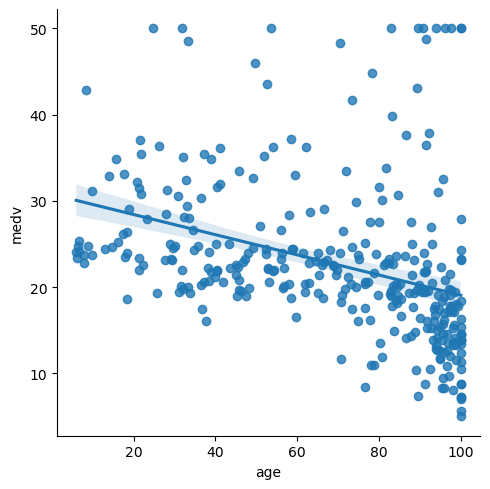

In [9]:
sns.lmplot(data=data, x="age", y="medv")

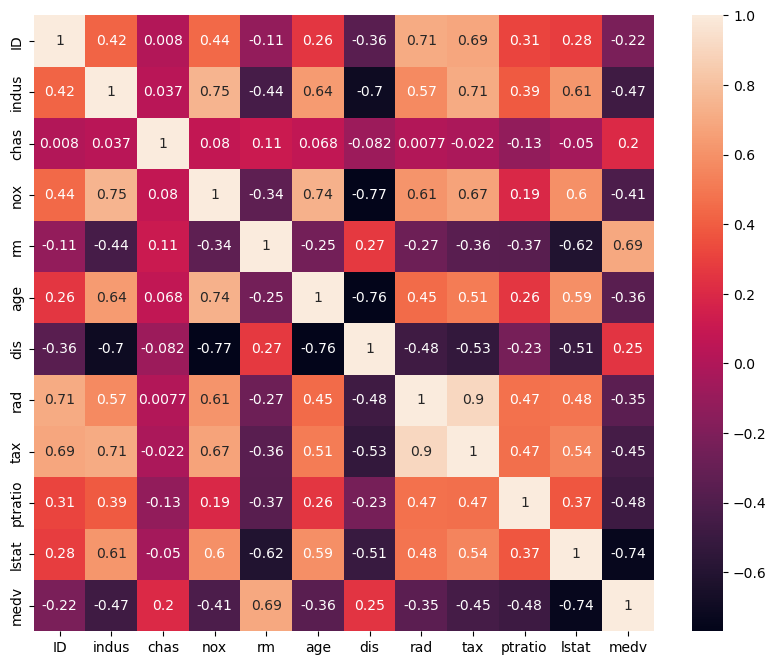

In [12]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression\n")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

In [16]:
from sklearn.linear_model import Lasso

# alpha -> 0 --> lasso, normal linear regression olur yani hiç regularization yoktur.
# alpha küçük --> Hafif regularization vardır, bazı katsayılar azalır ama sıfıra gitmeyebilir.
# alpha büyük --> güçlü regularization vardır, daha fazla katsayı sıfıra çekilir, özellik seçimi yapılır.

def lasso_model(x_train, y_train):
    print("Lasso Regression\n")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

In [17]:
from sklearn.linear_model import Ridge

# L2 Regularization

def ridge_model(x_train, y_train):
    print("Ridge Regression\n")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

In [18]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    print("SGD Regression\n")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

In [27]:
from sklearn.neural_network import MLPRegressor

def mlp_model(x_train, y_train):
    print("MLP Regression\n")
    mlp_regression = MLPRegressor(activation='relu', hidden_layer_sizes={12, 12, 12}, solver = 'lbfgs', verbose = True, max_iter=20000) # 3 hidden layers, 12 nöron
    mlp_regression.fit(x_train, y_train)
    return mlp_regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score: ", r_score)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10,8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("medv of home")
    plt.legend()
    plt.show()

    return {'model' : model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred'  : y_pred,  'sample' : df_y.sample(10)            
            }

Linear Regression

Training Score :  0.7191154693675492
Testing Score:  0.691708689565742
     y_test     y_pred
255     7.4   5.121107
15     15.2  15.835863
37     31.6  30.700216
64     25.0  29.587203
175    43.1  34.636335
78     19.2  24.515104
171    24.4  24.932337
22     30.8  30.046916
101    15.4  13.269913
116    17.4  23.376471


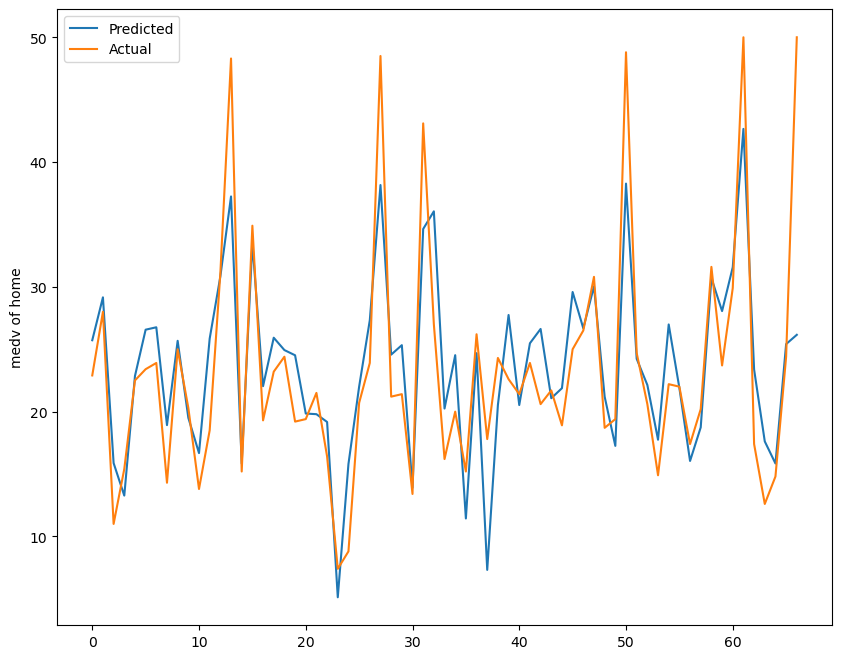

In [29]:
linear_reg = build_and_train_model(data, "medv", linear_model)

Lasso Regression

Training Score :  0.6566757521264173
Testing Score:  0.6360273716630047
     y_test     y_pred
7      21.7  21.179899
108    27.0  30.791065
49     23.4  25.169471
68     26.5  25.961938
116    17.4  22.116540
124    29.9  28.660951
63     22.6  25.620669
276    11.0  16.395016
55     23.9  26.611783
311    13.8  15.983864


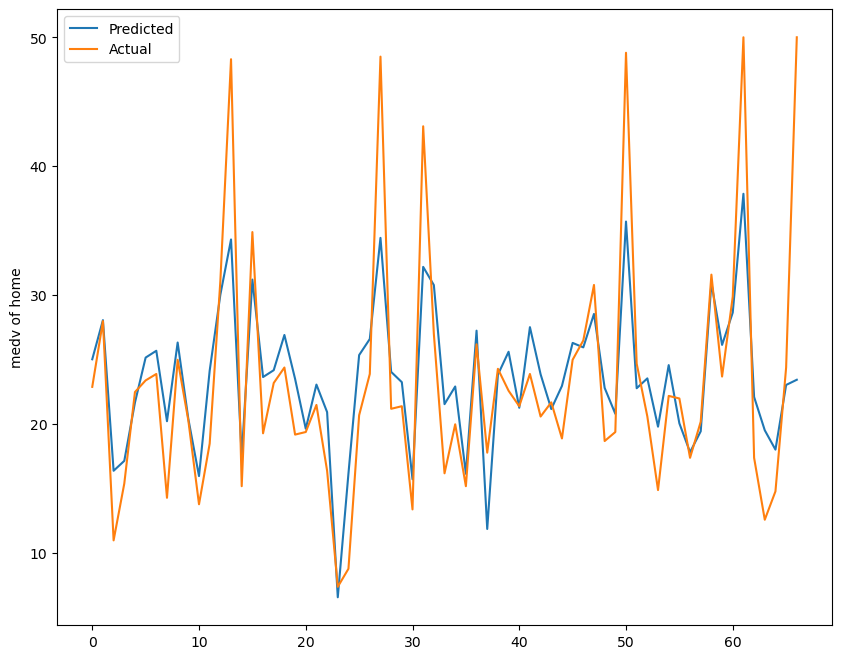

In [30]:
lasso_reg = build_and_train_model(data, "medv", lasso_model)

Ridge Regression

Training Score :  0.7190840578724755
Testing Score:  0.6922769270309592
     y_test     y_pred
225    18.7  21.205922
132    34.9  33.544585
280    14.3  18.925899
37     31.6  30.669033
101    15.4  13.381928
221    20.7  22.028821
97     13.4  14.037900
276    11.0  15.886843
6      18.9  21.873153
59     22.5  22.844307


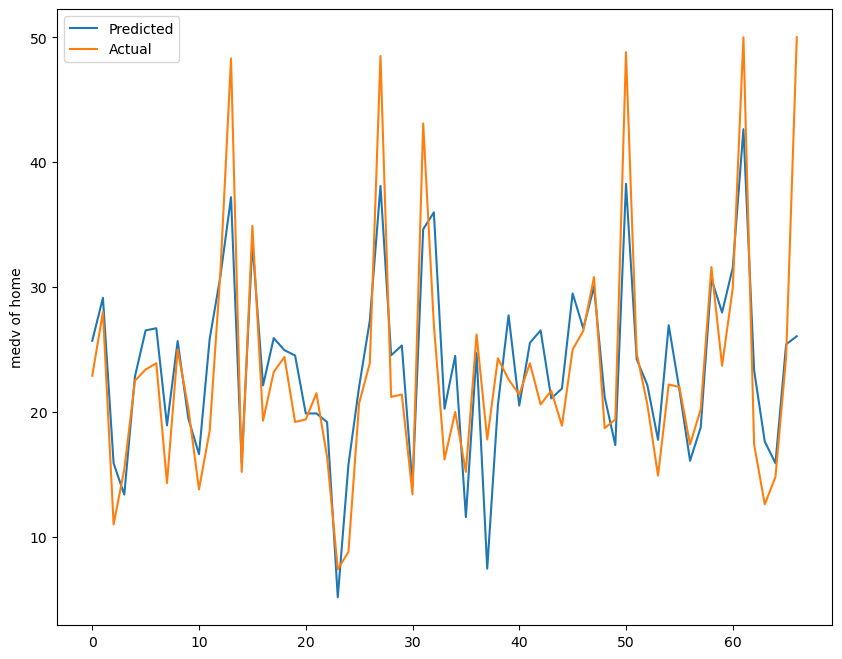

In [31]:
ridge_reg = build_and_train_model(data, "medv", ridge_model)

SGD Regression

Training Score :  0.7180216991523902
Testing Score:  0.6920111101880901
     y_test     y_pred
210    16.2  20.247339
171    24.4  24.859213
280    14.3  19.034923
299    16.4  19.286811
78     19.2  24.803045
124    29.9  31.504657
122    23.2  25.958863
189    50.0  42.385538
60     22.2  26.857762
65     20.6  26.051054


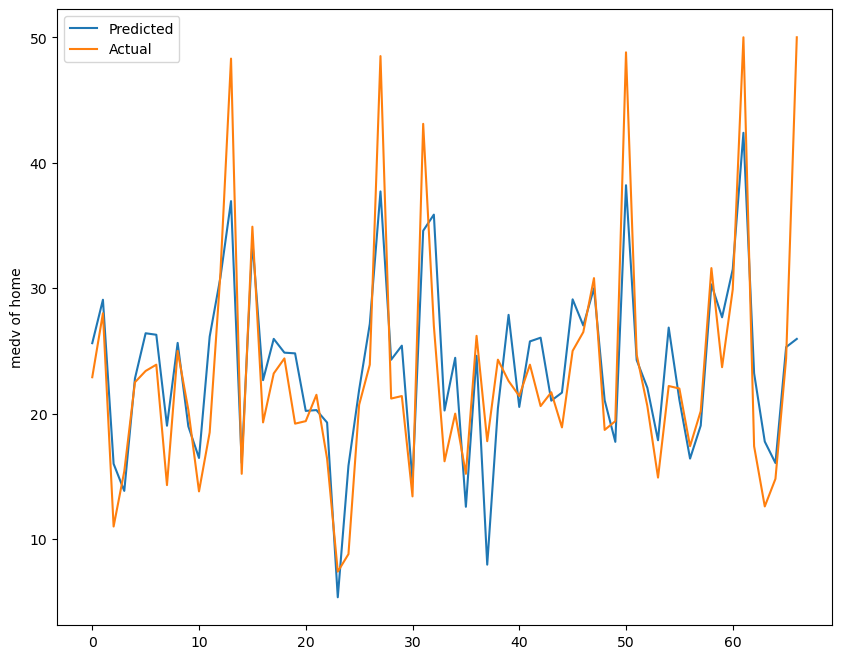

In [ ]:
sgd_reg = build_and_train_model(data, "medv", sgd_model)

MLP Regression

Training Score :  0.9666465578403114
Testing Score:  0.7822124517241782
     y_test     y_pred
54     28.0  26.622752
7      21.7  25.418671
6      18.9  22.192523
12     20.2  21.519441
74     19.4  16.053893
141    48.5  49.415132
55     23.9  18.422409
210    16.2  17.030605
22     30.8  29.748982
176    48.8  60.371428


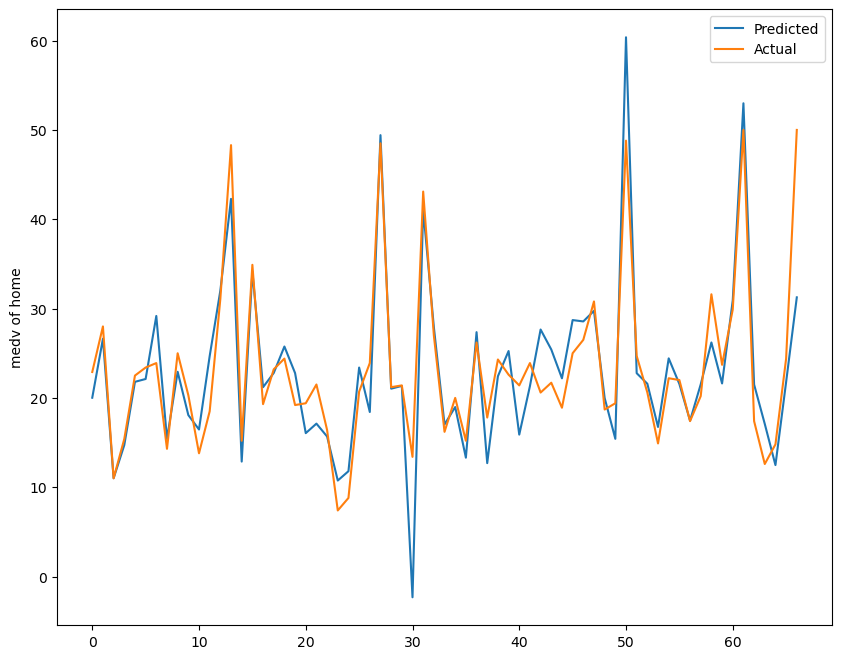

In [33]:
mlp_reg = build_and_train_model(data, "medv", mlp_model)

MLP Regression

Training Score :  0.9658468795293866
Testing Score:  0.788595221142912
     y_test     y_pred
17     35.2  36.855164
66     18.9  22.659434
12     16.7  15.908579
171    27.5  22.573522
103    24.5  24.968609
68     50.0  49.729230
100    24.7  25.365980
97     46.0  40.273408
271    24.8  26.136293
215    37.0  31.934747


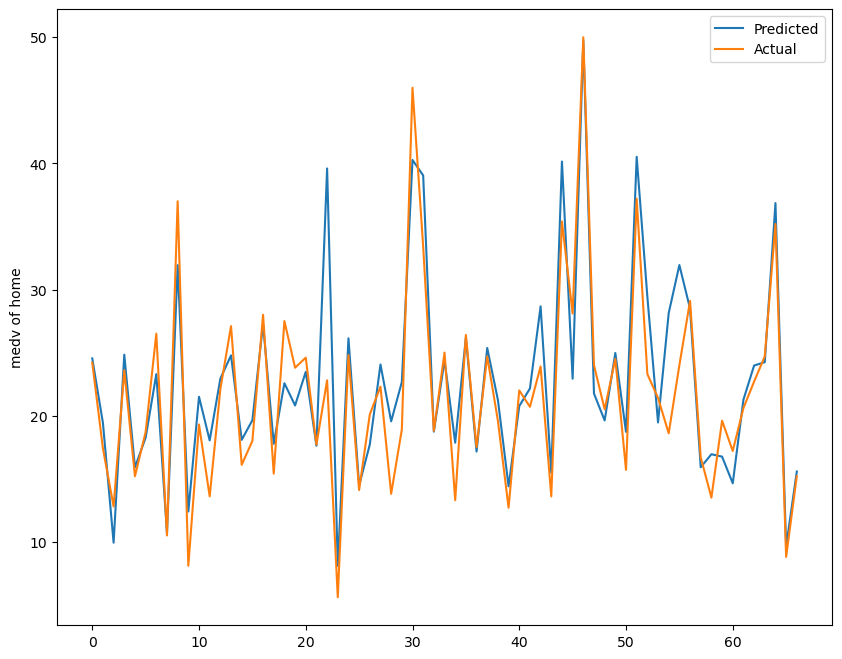

In [34]:
data = data.sample(frac=1).reset_index(drop=True)

mlp_reg = build_and_train_model(data, "medv", mlp_model)

### ÖDEV
-   "RANSACRegressor",
    "PoissonRegressor",
    "GammaRegressor",
    "TweedieRegressor",
    "ARDRegression",
    "BayesianRidge",
    "ElasticNet",

- Bu algoritmaları kullanarak yeni bir fonksiyonlar yazalım. Ve grafiğini çizdirelim. Algoritmaların temel çalışma mantığını açıklayalım.
- L1, L2 Regularization kavramlarını hatırlayalım.